# ===============================================================

# WINE QUALITY PREDICTION

# ===============================================================

# 

## importing the libraries

In [45]:
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import metrics

## reading the dataset

In [46]:
data = pd.read_csv(
    "/home/dhanola/KUBUNTU/DATASET/CSV_FILES/winequality-red.csv")

print(data.shape)
data.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## checking missing values

In [47]:
data.isnull().all()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

## describing the summary of dataframe

In [48]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## checking the correlation between different attributes

<AxesSubplot:>

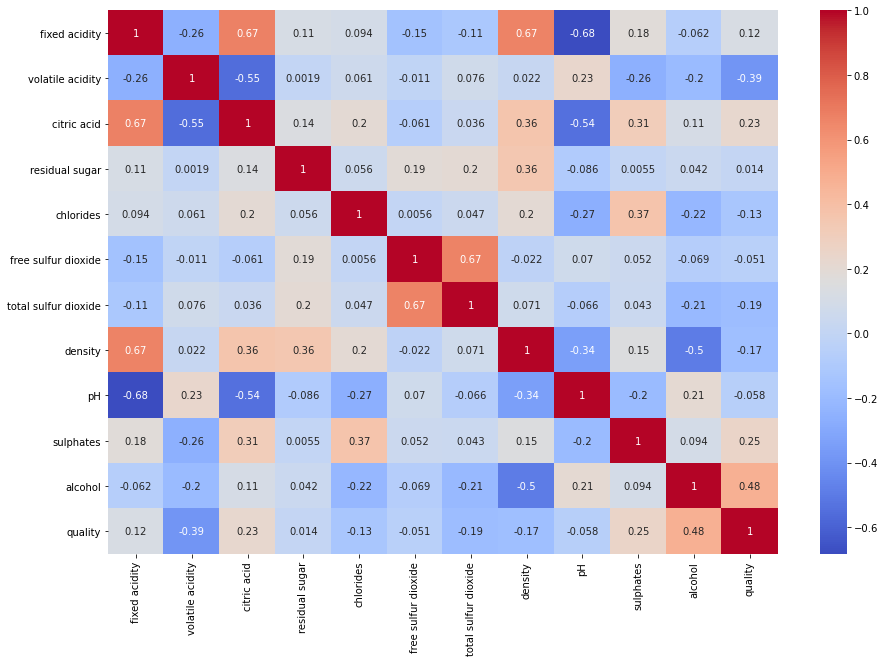

In [49]:
plt.subplots(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

## data preprocessing

### defining the features and target 

In [50]:
X = np.asarray(data.iloc[:, :-1])  # defining the features
y = np.asarray(data["quality"])  # defining the target

### standardizing the dataset

In [51]:
from sklearn import preprocessing
# it helps in standardize the different scale of features
X = preprocessing.StandardScaler().fit(X).transform(X)

### train and test sets split

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)
print("Training dataset:", X_train.shape, y_train.shape)
print("Testing dataset:", X_test.shape, y_test.shape)

Training dataset: (1279, 11) (1279,)
Testing dataset: (320, 11) (320,)


### validation and model selection

### 1. K-Nearest Neighbours

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
# Number of k from 1 to 26
k_range = range(1, 26)
k_scores = []
# Calculate cross validation score for every k number from 1 to 26
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # It’s 10 fold cross validation with ‘accuracy’ scoring
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

### KNN accuracy plot

Text(0, 0.5, 'Cross-validated accuracy')

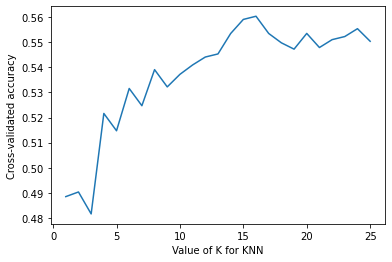

In [54]:
# plotting the accuracy change
%matplotlib inline
# Plot accuracy for every k number between 1 and 26
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

### cross validation for KNN 

In [55]:
# Train the model and predict for k=19
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
# classification report for test set
print(metrics.classification_report(y_test, y_pred, digits=3, zero_division=1))
print('accuracy', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           3      1.000     0.000     0.000         2
           4      1.000     0.000     0.000        11
           5      0.625     0.704     0.662       135
           6      0.599     0.599     0.599       142
           7      0.346     0.333     0.340        27
           8      1.000     0.000     0.000         3

    accuracy                          0.591       320
   macro avg      0.762     0.273     0.267       320
weighted avg      0.609     0.591     0.574       320

accuracy 0.590625


# model gives accuracy of `0.590625`

In [57]:
# Calculate cv score with 'accuracy' scoring and 10 folds
accuracy = cross_val_score(knn, X, y, scoring='accuracy', cv=10)
print('cross validation score', accuracy.mean())

cross validation score 0.5472327044025158


In [58]:
# Calculate cv score with 'roc_auc_ovr' scoring and 10 folds
accuracy = cross_val_score(knn, X, y, scoring='roc_auc_ovr', cv=10)
print('cross validation score with roc_auc', accuracy.mean())

cross validation score with roc_auc 0.7152270734711184


In [59]:
# Calculate roc_auc score with multiclass parameter
print('roc_auc_score', roc_auc_score(
    y_test, knn.predict_proba(X_test), multi_class='ovr'))

roc_auc_score 0.6851210171422698


### 2. Logistic Regression

In [60]:
# import module
from sklearn.linear_model import LogisticRegression

In [61]:
# Train and fit model
logreg = LogisticRegression(multi_class='multinomial', solver='newton-cg')
logreg.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [62]:
# Predict out-of-sample test set
y_pred = logreg.predict(X_test)

In [63]:
# classification report
print(metrics.classification_report(y_test, y_pred, digits=3, zero_division=1))
print('accuracy', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           3      1.000     0.000     0.000         2
           4      1.000     0.000     0.000        11
           5      0.689     0.770     0.727       135
           6      0.638     0.634     0.636       142
           7      0.321     0.333     0.327        27
           8      1.000     0.000     0.000         3

    accuracy                          0.634       320
   macro avg      0.775     0.290     0.282       320
weighted avg      0.651     0.634     0.617       320

accuracy 0.634375


# model gives accuracy of `0.634375`

In [64]:
# Calculate cv score with ‘roc_auc_ovr’ scoring and 10 folds
accuracy = cross_val_score(logreg, X, y, scoring='roc_auc_ovr', cv=10)
print('cross validation score with roc_auc', accuracy.mean())

cross validation score with roc_auc 0.8122395666925059


In [65]:
# Calculate roc_auc score with multiclass parameter
print('roc_auc_score', roc_auc_score(
    y_test, logreg.predict_proba(X_test), multi_class='ovr'))

roc_auc_score 0.7733433467826508


### Adding polynomial features to the logistic regression

In [66]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
# Add polynomial features to the logistic regression model


def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LogisticRegression(multi_class='multinomial', solver='newton-cg', **kwargs))

### adding 3rd degree polynomial features to the logistic regression model.

In [67]:
# Train and fit the 3rd degree polynomial regression model
poly = PolynomialRegression(3)
poly.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('logisticregression',
                 LogisticRegression(multi_class='multinomial',
                                    solver='newton-cg'))])

In [68]:
# Test out-of-sample test set
y_pred = poly.predict(X_test)

In [69]:
# Classification report
print(metrics.classification_report(y_test, y_pred, digits=3))
print('accuracy', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           3      0.000     0.000     0.000         2
           4      0.000     0.000     0.000        11
           5      0.671     0.696     0.684       135
           6      0.677     0.620     0.647       142
           7      0.349     0.556     0.429        27
           8      0.000     0.000     0.000         3

    accuracy                          0.616       320
   macro avg      0.283     0.312     0.293       320
weighted avg      0.613     0.616     0.612       320

accuracy 0.615625


# model gives accuracy of `0.615625`

In [70]:
# Calculate cv score with 'roc_auc_ovr' scoring and 10 folds
accuracy = cross_val_score(poly, X, y, scoring='roc_auc_ovr', cv=10)
print('cross validation score with roc_auc_ovr scoring', accuracy.mean())
# Calculate roc_auc score with multiclass parameter
print('roc_auc_score', roc_auc_score(
    y_test, poly.predict_proba(X_test), multi_class='ovr'))

cross validation score with roc_auc_ovr scoring 0.641826720035031
roc_auc_score 0.6404490224017735


### 3.Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier
# Train and fit the Decision Tree Classification model
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [72]:
# Evaluate the model with out-of-sample test set
y_pred = tree.predict(X_test)

In [73]:
# Classification report
print(metrics.classification_report(y_test, y_pred.round(), digits=3))
print('accuracy', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           3      0.000     0.000     0.000         2
           4      0.429     0.273     0.333        11
           5      0.761     0.756     0.758       135
           6      0.710     0.690     0.700       142
           7      0.528     0.704     0.603        27
           8      0.000     0.000     0.000         3

    accuracy                          0.694       320
   macro avg      0.405     0.404     0.399       320
weighted avg      0.696     0.694     0.693       320

accuracy 0.69375


# model gives accuracy of `0.69375`

In [74]:
# Calculate cv score with ‘roc_auc_ovr’ scoring and 10 folds
accuracy = cross_val_score(tree, X, y, scoring='roc_auc_ovr', cv=10)
print('cross validation score with roc_auc_ovr scoring', accuracy.mean())
# Calculate roc_auc score with multiclass parameter
print('roc_auc_score', roc_auc_score(
    y_test, tree.predict_proba(X_test), multi_class='ovr'))

cross validation score with roc_auc_ovr scoring 0.5768482985141795
roc_auc_score 0.6614764008960282


### 4. Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier
# Train and fit the Random Forest Classification model
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [76]:
# Test out-of-sample test set
y_pred = forest.predict(X_test)

In [77]:
# Classification report
print(metrics.classification_report(y_test, y_pred.round(), digits=3))
print('accuracy', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           3      0.000     0.000     0.000         2
           4      0.000     0.000     0.000        11
           5      0.733     0.815     0.772       135
           6      0.732     0.711     0.721       142
           7      0.533     0.593     0.561        27
           8      0.000     0.000     0.000         3

    accuracy                          0.709       320
   macro avg      0.333     0.353     0.342       320
weighted avg      0.679     0.709     0.693       320

accuracy 0.709375


/home/dhanola/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dhanola/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dhanola/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# model gives accuracy of `0.709375`

In [78]:
# Calculate cv score with 'roc_auc_ovr' scoring and 10 folds
accuracy = cross_val_score(forest, X, y, scoring='roc_auc_ovr', cv=10)
print('cross validation score with roc_auc_ovr scoring', accuracy.mean())
# Calculate roc_auc score with multiclass parameter
print('roc_auc_score', roc_auc_score(
    y_test, forest.predict_proba(X_test), multi_class='ovr'))

cross validation score with roc_auc_ovr scoring 0.7744698089165192
roc_auc_score 0.7731111820064127


### 5. Support Vector Machines (SVM)

In [79]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [80]:
# Predicting the Test Set
y_pred = classifier.predict(X_test)

<AxesSubplot:>

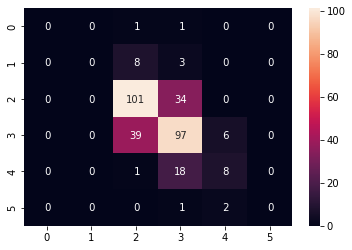

In [81]:
# making confusing matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='2.0f')

In [83]:
# k-Fold cross validation for improving our model
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train,
                             y=y_train, cv=10)
# we can see model's average accuracy
accuracies.mean()

/home/dhanola/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


0.6043614665354331

In [94]:
print(metrics.classification_report(y_test, y_pred.round(), digits=3))
print('accuracy', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           3      0.000     0.000     0.000         2
           4      0.000     0.000     0.000        11
           5      0.673     0.748     0.709       135
           6      0.630     0.683     0.655       142
           7      0.500     0.296     0.372        27
           8      0.000     0.000     0.000         3

    accuracy                          0.644       320
   macro avg      0.301     0.288     0.289       320
weighted avg      0.606     0.644     0.621       320

accuracy 0.64375


/home/dhanola/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dhanola/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dhanola/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# model gives accuracy of `0.64375`

# 

# ===============================================================

# THE END

# ===============================================================